#### Q1-Clustering
Author: Isil Erbasol Serbes

1.	Load and visualize the data distribution in 2d 

In [1]:
#Import the necessary libraries
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import metrics

## Task : Load the mystry data for clustering in a pandas data frame.  
#Load the "mysteryDataClustering-1" data and assign to a dataframe called df
df = pd.read_csv('mysteryDataClustering-1.csv',index_col=0) #the first column was index, I therefore assign to it as index column.


## Data vizualization.
Q1.1 How many features does the data contain ?
Q1.2 How many samples does the data contain ?
Q1.3 Which features are correlated ?

Feature 1  Feature 2  Feature 3   Feature 4
0  -8.275703   0.216832  -7.007719   69.755248
1 -10.811589   5.984760 -11.123214  116.578820
2  -9.727651  11.917844  -9.795153   94.559698
3   8.610897 -11.034426   9.054639   74.591292
4 -12.932321  11.714095 -13.337149  166.840089

(1000, 4)


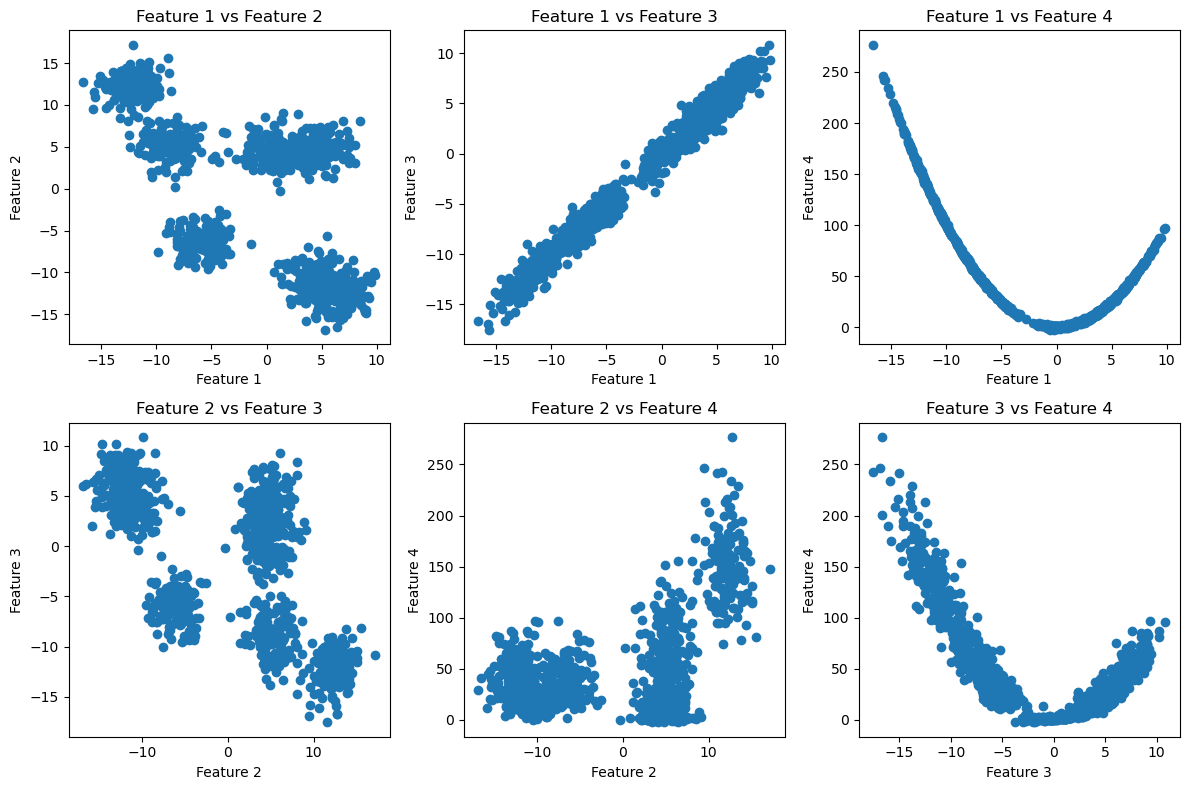

pearson correlations


Feature 1  Feature 2  Feature 3  Feature 4
Feature 1   1.000000  -0.614647   0.990012  -0.704039
Feature 2  -0.614647   1.000000  -0.611092   0.486455
Feature 3   0.990012  -0.611092   1.000000  -0.695498
Feature 4  -0.704039   0.486455  -0.695498   1.000000

spearman correlations


Feature 1  Feature 2  Feature 3  Feature 4
Feature 1   1.000000  -0.666123   0.982181  -0.457877
Feature 2  -0.666123   1.000000  -0.659579   0.330569
Feature 3   0.982181  -0.659579   1.000000  -0.463360
Feature 4  -0.457877   0.330569  -0.463360   1.000000

In [2]:
# Data vizualization.

#check the data if imported correctly (visual inspection)
##import the IPython.display for visualization the dataframe more structured
from IPython.display import display
display(df.head(5))

#check the dimensions of the data (how many samples and how many features exist in the data- Q1.1 and Q1.2)
print(df.shape)

# In order understand correlations between feature pairs, it is always good step to check first visually
#(because we can miss non-linear correlations if we perform pearson for all feature pairs) 

#Visualization the features via plot in order to check their correlations

## Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

## Plot Feature 1 and Feature 2
axs[0, 0].scatter(df["Feature 1"], df["Feature 2"])
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')
axs[0, 0].set_title('Feature 1 vs Feature 2')

## Plot Feature 1 and Feature3
axs[0, 1].scatter(df["Feature 1"], df["Feature 3"])
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].set_ylabel('Feature 3')
axs[0, 1].set_title('Feature 1 vs Feature 3')

## Plot Feature 1 and Feature 4
axs[0, 2].scatter(df["Feature 1"], df["Feature 4"])
axs[0, 2].set_xlabel('Feature 1')
axs[0, 2].set_ylabel('Feature 4')
axs[0, 2].set_title('Feature 1 vs Feature 4')

## Plot Feature 2 and Feature 3
axs[1, 0].scatter(df["Feature 2"], df["Feature 3"])
axs[1, 0].set_xlabel('Feature 2')
axs[1, 0].set_ylabel('Feature 3')
axs[1, 0].set_title('Feature 2 vs Feature 3')

## Plot Feature 2 and Feature 4
axs[1, 1].scatter(df["Feature 2"], df["Feature 4"])
axs[1, 1].set_xlabel('Feature 2')
axs[1, 1].set_ylabel('Feature 4')
axs[1, 1].set_title('Feature 2 vs Feature 4')

## Plot Feature 3 and Feature 4
axs[1, 2].scatter(df["Feature 3"], df["Feature 4"])
axs[1, 2].set_xlabel('Feature 3')
axs[1, 2].set_ylabel('Feature 4')
axs[1, 2].set_title('Feature 3 vs Feature 4')

## Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

'''plots indicate linear and non-linear correlations. we can now check the correlation coefficients'''

#check which features are correlated by using corr() function in pandas 
##for pearson (linear)
correlation_pearson = df.corr(method='pearson')
print("pearson correlations")
display(correlation_pearson)

##for spearman (non-linear)
correlation_spearman = df.corr(method='spearman')
print("spearman correlations")
display(correlation_spearman)


### Q1.1 How many features does the data contain ?
    * The dataset contains 4 features.
    
### Q1.2 How many samples does the data contain ?
    * The dataset contains 1000 samples.

### Q1.3 Which features are correlated ? 
    * Both correlation coefficient tables and plots indicate strong, moderate and weak correlations in both positive and negative directions. 
     For example, Feature 1 and Feature 3 has a strong linear positive correlation (r=0.99).
    Whereas, Feature 1 and Feature 2, Feature 1 and Feature 4,Feature 2 and Feature 3, Feature 2 and Feature 4, and Feature 3 and Feature 4 show weak or moderate correlations both in positive or negative directions. 


2.	Clustering. 

2.1 Select any two non-redundant features. Non redundant features are features are correlted to each other. Try to avoid features that are strongly correlated to each other. If two features are highly correlated to each other only use one from the pair. 
2.2 Subset the data using only two non-redundant features.
2.3 Pass the subset data (two features) through at least two clustering algorithms (eg https://scikit-learn.org/stable/modules/clustering.html) and generate at least three fitness statistics across several values of K

#### 2.1 Select any two non-redundant features. Non redundant features are features are correlted to each other. Try to avoid features that are strongly correlated to each other. If two features are highly correlated to each other only use one from the pair. 

      * According to information given related to non-reduntant features, I would like to chose the Feature 2 and Feature 3 as two non-redundant features for further analysis as they have a moderate correlation (r=-0.61). 

#### 2.2 Subset the data using only two non-redundant features.

In [3]:
# Create a new DataFrame 'X' (input) by selecting columns 'Feature 2' and 'Feature 3' from the original DataFrame 'df':

X = df[["Feature 2", "Feature 3"]]

#checking the new dataframe
display(X.head(5))
#checking the dimensions 
print(X.shape)


Feature 2  Feature 3
0   0.216832  -7.007719
1   5.984760 -11.123214
2  11.917844  -9.795153
3 -11.034426   9.054639
4  11.714095 -13.337149

(1000, 2)


It seems like we subset the data set correctly.

#### 2.3 Pass the subset data (two features) through at least two clustering algorithms (eg https://scikit-learn.org/stable/modules/clustering.html) and generate at least three fitness statistics across several values of K

Based on the examples given in scikit website and comparison with my visualization the data, I would like to try Kmeans and Gaussion mixture model for Feature 2 and Feature 3 since they could fit the data, and I will go for the following fitness scores:silhouette score,calinski harabasz score and davies bouldin score since they are comparable between two algorithms. However, I would like to obtain distortion score for K means and Log likelihood values for Gaussion mixture model in order to generate elbow plots to decide which cluster value I should finally decide.

In [4]:
#you can run them together in one loop or sequentially

#create a data frame to save the clustering result (I dont want to save the result in X,
#which I will use as input for model fit, this can cause confusion during model fit process)

## The '.loc' method is used to access the specified rows and columns by label-based indexing
## The `:` indicates that we want to select all rows, and ["Feature 2", "Feature 3"] specifies the columns we want to include
## The resulting DataFrame is then copied using the '.copy()' method to avoid the 'SettingWithCopyWarning'

##for K_means
df_km=df.loc[:, ["Feature 2", "Feature 3"]].copy()

##for Gaussion mixture model

df_gmm=df.loc[:, ["Feature 2", "Feature 3"]].copy()


#########################################Algoritm1###################################################
#K means
#import KMeans
from sklearn.cluster import KMeans

#lists of lists for storage
results_km   = {
    'centroids':{},
    'distortion_score':{}, # I would like to generate elbow plot, therefore I will also obtain this score
    'silhouette_score':{},
    'calinski_harabasz_score':{},
    'davies_bouldin_score':{},
    }

#parameter range  (minimum cluster 2 (k=2) and maximum 15 (k=15))
min_clust_num = 2 # for silhouette_score calculation we need minimum 2 clusters
max_clust_num = 15

#running loop
for k in range(min_clust_num,max_clust_num+1):
    kmeans = KMeans(n_clusters=k, init='random').fit(X) # since I want to use kmeans rather than kmeans ++,I will use init='random'
    
    #saving needed values for kmeans(km)
    df_km['cluster_k{}_km'.format(k)]        = kmeans.labels_
    results_km['centroids'][k]               = kmeans.cluster_centers_
    results_km['distortion_score'][k]        = kmeans.inertia_
    results_km['silhouette_score'][k]        = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    results_km['calinski_harabasz_score'][k] = metrics.calinski_harabasz_score(X, kmeans.labels_)
    results_km['davies_bouldin_score'][k]    = metrics.davies_bouldin_score(X, kmeans.labels_)

    
# create an empty DataFrame to fill the scores for kmeans
df_scores_km = pd.DataFrame()

# set column Silhouette Score,Calinski Harabasz Score and Davies Bouldin Score to be results kept in the dictionary results['*_score']
df_scores_km['Distortion Score']  = pd.Series(results_km['distortion_score'])
df_scores_km['Silhouette Score']  = pd.Series(results_km['silhouette_score'])
df_scores_km['Calinski Harabasz Score']  = pd.Series(results_km['calinski_harabasz_score'])
df_scores_km['Davies Bouldin Score']  = pd.Series(results_km['davies_bouldin_score'])

#set index 
df_scores_km.index.name='k'

#########################################Algoritm2###################################################
#Gaussion mixture model
#import Gaussion mixture model
from sklearn.mixture import GaussianMixture

#lists of lists for storage
results_gmm    = {
    'log_likelihood':{},# I would like to generate elbow plot, therefore I will also obtain this score
    'silhouette_score':{},
    'calinski_harabasz_score':{},
    'davies_bouldin_score':{},
    }

#running loop
for k in range(min_clust_num,max_clust_num+1):
    gmm_clustering = GaussianMixture(n_components=k).fit(X)
    #saving needed values for gaussion mixture
    # set labels (here called predict)
    predicted_labels = gmm_clustering.predict(X)
    df_gmm['cluster_k{}_gmm'.format(k)] = predicted_labels

    results_gmm['log_likelihood'][k] = gmm_clustering.score(X) 
    results_gmm['silhouette_score'][k] = metrics.silhouette_score(X, predicted_labels, metric='euclidean')
    results_gmm['calinski_harabasz_score'][k] = metrics.calinski_harabasz_score(X, predicted_labels)
    results_gmm['davies_bouldin_score'][k]    = metrics.davies_bouldin_score(X, predicted_labels)

# create an empty DataFrame
df_scores_gmm = pd.DataFrame()

# set column Silhouette Score,Calinski Harabasz Score and Davies Bouldin Score to be results kept in the dictionary results['*_score']
df_scores_gmm['Log Likelihood']          = pd.Series(results_gmm['log_likelihood'])
df_scores_gmm['Silhouette Score']        = pd.Series(results_gmm['silhouette_score'])
df_scores_gmm['Calinski Harabasz Score'] = pd.Series(results_gmm['calinski_harabasz_score'])
df_scores_gmm['Davies Bouldin Score']    = pd.Series(results_gmm['davies_bouldin_score'])

#set index
df_scores_gmm.index.name='k'


3. Visualize the results for both clustering runs across K values

In [5]:
#Algorithm 1
#Visualise the scores for Kmeans
df_scores_km

Distortion Score  Silhouette Score  Calinski Harabasz Score  \
k                                                                 
2       53246.475822          0.531651              1406.508263   
3       26468.837569          0.590063              1917.611070   
4       11439.976268          0.680747              3391.055939   
5        7078.960642          0.675621              4259.211445   
6        5646.330985          0.614375              4318.120842   
7        4717.050170          0.514371              4335.552765   
8        4379.935235          0.468861              4009.092755   
9        4077.074890          0.474539              3773.943208   
10       3737.673659          0.413034              3665.529836   
11       3523.289751          0.364899              3503.505640   
12       3235.610068          0.396592              3471.901301   
13       3188.372771          0.370444              3227.306615   
14       2936.674788          0.331744              3238.059912   
15       2720.928594          0.342670              3247.670298   

    Davies Bouldin Score  
k                         
2               0.750841  
3               0.566635  
4               0.444562  
5               0.439763  
6               0.569034  
7               0.719498  
8               0.835393  
9               0.818352  
10              0.957080  
11              1.018717  
12              0.957696  
13              0.970086  
14              1.030565  
15              0.991105

    * The Silhouette Score is a metric used to evaluate the quality of clustering results and it ranges -1 to 1 and higher values indicate better clustering result. 

    * Calinski Harabasz Score is also a metric used to evaluate the quality of clustering results and a higher score indicates better-defined and more separated clusters.

    * Davies Bouldin Score is also a metric used to evaluate the quality of clustering results and it ranges from 0 to infinity,where a lower value indicates better clustering. 

   ##### Based on this information, we have the highest Silhouette score in k=4, the highest Calinski Harabasz Score in k=7,and the lowest Davies Bouldin Score in k=5. 

    * We can also visualize them via plot:

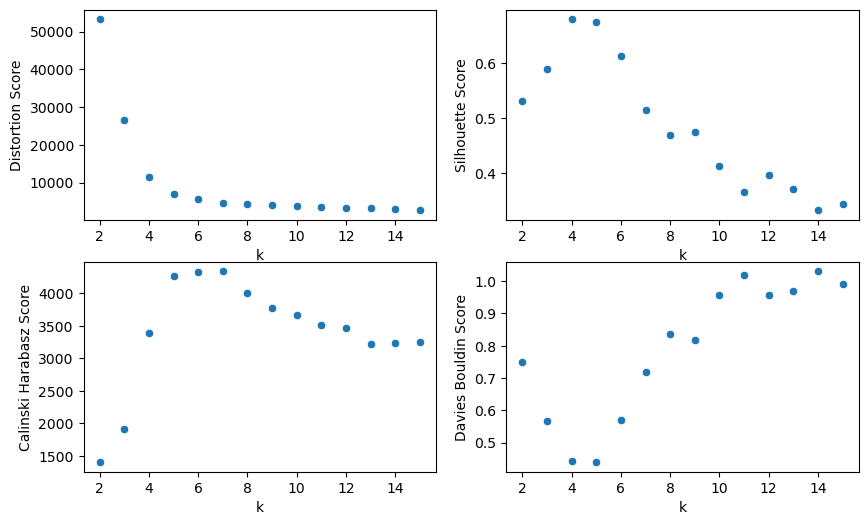

In [6]:
#Visualization of scores by plots in a single figure

#import seaborn library 
import seaborn as sns

fig,axes =  plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for score, ax in zip(df_scores_km.columns,axes.flatten()):
    sns.scatterplot(x='k', y=score, data=df_scores_km, ax = ax)

    The elbow plot(distortion score plot) for Kmeans indicates that the elbow line gets flatten at k=6 (although the elbow shape is not very visible), suggesting that adding more clusters beyond k=6 may not provide significant improvements in terms of the distortion score. On the otherhand, metric scores indicate different cluster values (we have the highest Silhouette score in k=4, the highest Calinski Harabasz Score in k=7,and the lowest Davies Bouldin Score in k=5.) 
    
    Let's also have a look at gmm scores:

In [7]:
#Algorithm 2
#Visualise the scores for Gaussion Mixture Model
df_scores_gmm

Log Likelihood  Silhouette Score  Calinski Harabasz Score  \
k                                                               
2        -6.190371          0.533033              1404.073894   
3        -5.971936          0.551091              1671.749533   
4        -5.644262          0.679696              3364.178566   
5        -5.546016          0.676010              4229.586574   
6        -5.541708          0.603724              3493.472985   
7        -5.536908          0.583222              3791.800306   
8        -5.532862          0.466189              3980.823264   
9        -5.532459          0.432350              3746.099845   
10       -5.530147          0.379250              3482.621942   
11       -5.530785          0.383925              3453.255208   
12       -5.524729          0.391996              3164.015321   
13       -5.520252          0.352733              3101.747178   
14       -5.521118          0.359591              2988.510630   
15       -5.517764          0.318733              2996.874900   

    Davies Bouldin Score  
k                         
2               0.758696  
3               0.780299  
4               0.444081  
5               0.435348  
6               0.671642  
7               0.687842  
8               0.844992  
9               0.931905  
10              0.985556  
11              0.977230  
12              0.966984  
13              0.970977  
14              0.969410  
15              1.035706

##### Based on this information, we have the highest Silhouette score in k=4, the highest Calinski Harabasz Score in k=5,and the lowest Davies Bouldin Score in k=5. We can also visualize them via plot:


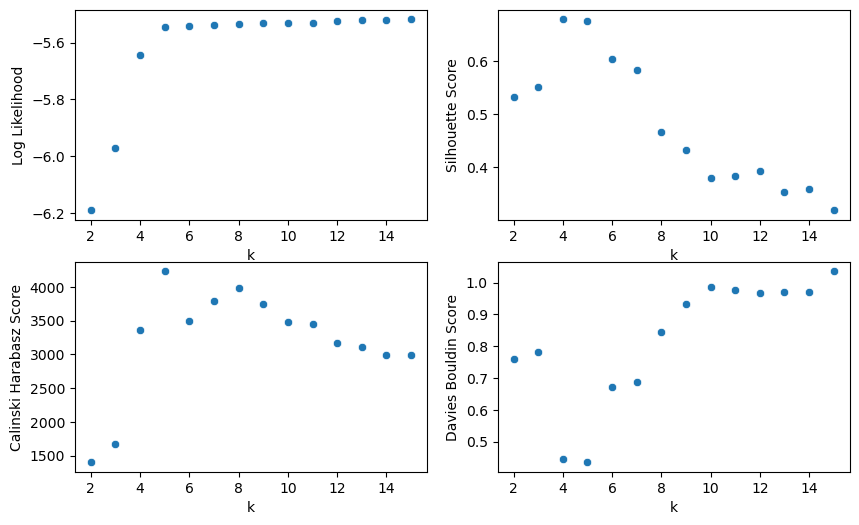

In [8]:
#Visualization of scores by plots in a single figure

fig,axes =  plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for score, ax in zip(df_scores_gmm.columns,axes.flatten()):
    sns.scatterplot(x='k', y=score, data=df_scores_gmm, ax = ax)

The elbow plot (log likelihood score plot) for gmm indicates that the elbow line gets flatten at k=5,suggesting that adding more clusters beyond k=5 may not provide significant improvements in terms of the log likelihood score. 

On the otherhand, metric scores indicate different cluster values (we have the highest Silhouette score in k=4, the highest Calinski Harabasz Score in k=5,and the lowest Davies Bouldin Score in k=5) 


4.	Visualize cluster assignment and/or centroids 

Feature 2  Feature 3  cluster_k2_km  cluster_k3_km  cluster_k4_km  \
0     0.216832  -7.007719              0              0              0   
1     5.984760 -11.123214              0              0              3   
2    11.917844  -9.795153              0              0              3   
3   -11.034426   9.054639              1              1              1   
4    11.714095 -13.337149              0              0              3   
..         ...        ...            ...            ...            ...   
995   5.510563 -10.989612              0              0              3   
996 -12.421054   4.547262              1              1              1   
997 -10.625035   4.655652              1              1              1   
998   4.230038  -1.565846              0              2              2   
999 -11.333230   9.280411              1              1              1   

     cluster_k5_km  cluster_k6_km  cluster_k7_km  cluster_k8_km  \
0                1              2              5              3   
1                1              2              5              1   
2                2              0              0              4   
3                0              4              3              7   
4                2              0              0              4   
..             ...            ...            ...            ...   
995              1              2              5              1   
996              0              4              6              0   
997              0              4              6              0   
998              3              1              4              2   
999              0              4              3              7   

     cluster_k9_km  cluster_k10_km  cluster_k11_km  cluster_k12_km  \
0                6               0               5              10   
1                6               2               8               8   
2                3               6               3               9   
3                2               8               2               6   
4                3               4               6               3   
..             ...             ...             ...             ...   
995              6               2               8               8   
996              0               5               0               7   
997              1               5               9               0   
998              8               9               4               2   
999              2               8               2               6   

     cluster_k13_km  cluster_k14_km  cluster_k15_km  
0                12               4               0  
1                 3               9               7  
2                 0               6               9  
3                 6              13              10  
4                 0               8              12  
..              ...             ...             ...  
995               3               9               7  
996               9               3              13  
997              10              12               3  
998              11              10               6  
999               6              13              10  

[1000 rows x 16 columns]

{2: array([[  6.52475805,  -4.12247516],
        [-10.01231199,   1.72381805]]),
 3: array([[  8.65109967, -10.5978794 ],
        [ -9.9091383 ,   1.57065455],
        [  4.6277085 ,   2.50859564]]),
 4: array([[ -6.12816115,  -5.94018619],
        [-11.75116318,   5.32023546],
        [  4.6277085 ,   2.50859564],
        [  8.70618005, -10.62470501]]),
 5: array([[-11.75116318,   5.32023546],
        [  5.11526152,  -8.80423987],
        [ 12.19480079, -12.29190778],
        [  4.63108493,   2.57229839],
        [ -6.22508853,  -5.92850726]]),
 6: array([[ 12.22014602, -12.30301087],
        [  4.536977  ,   0.28177291],
        [  5.15589567,  -8.92802651],
        [ -6.22508853,  -5.92850726],
        [-11.75116318,   5.32023546],
        [  4.72103233,   4.79904187]]),
 7: array([[ 12.22014602, -12.30301087],
        [ -6.22508853,  -5.92850726],
        [  4.71130713,   4.86498796],
        [-12.5795746 ,   6.80982469],
        [  4.55088814,   0.34326216],
        [  5.15589567,

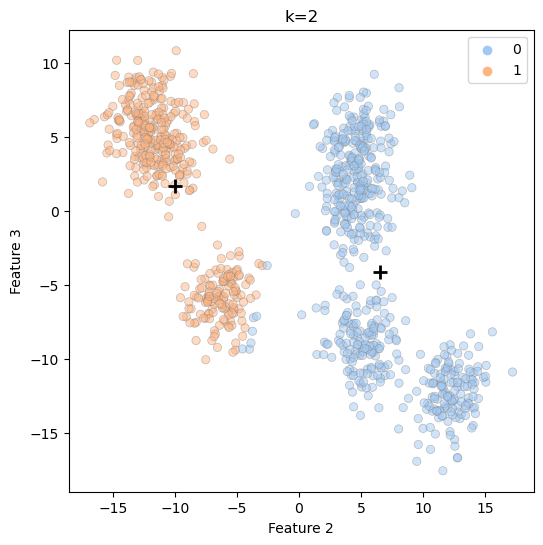

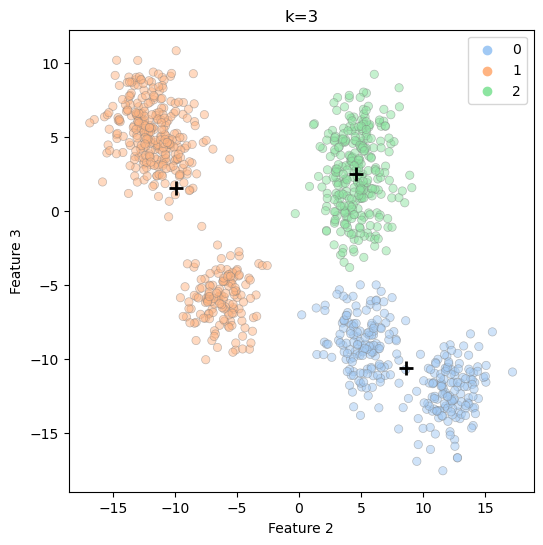

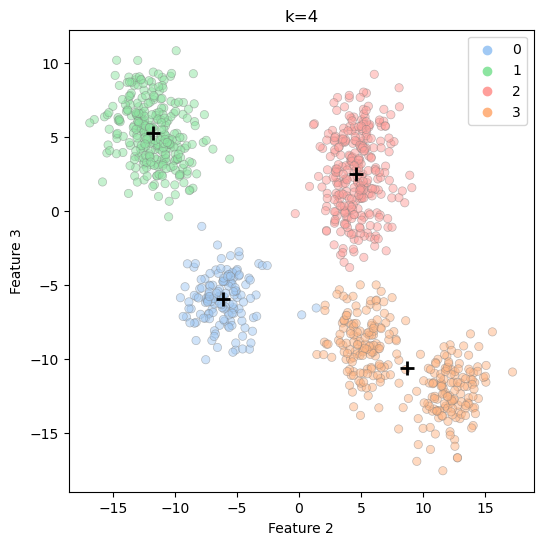

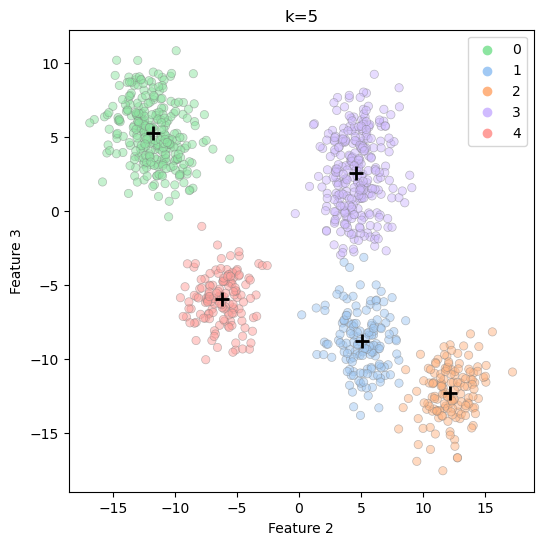

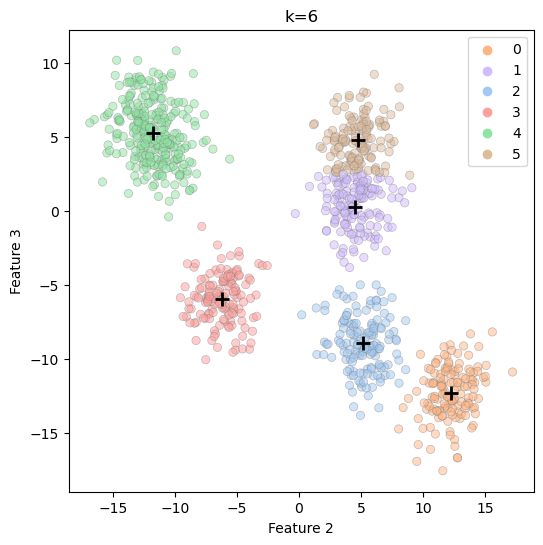

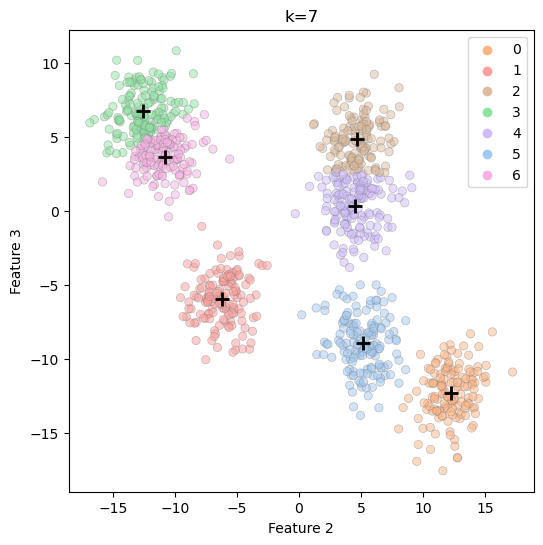

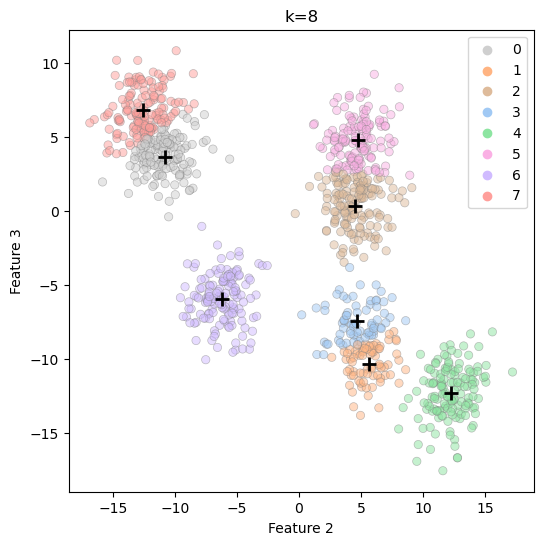

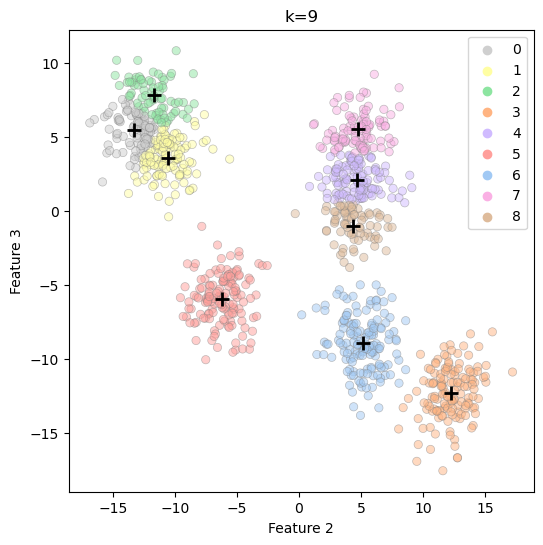

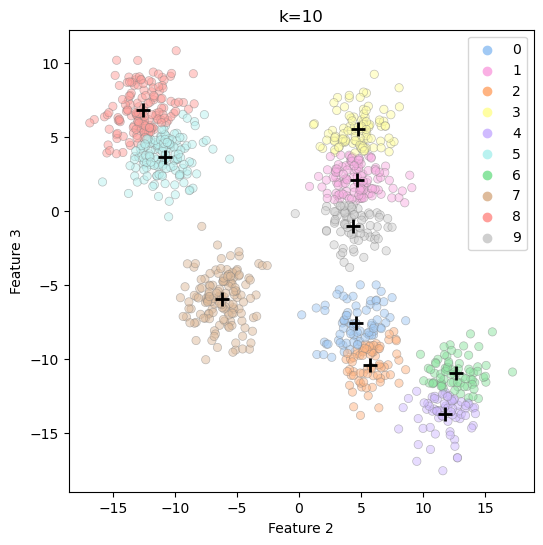

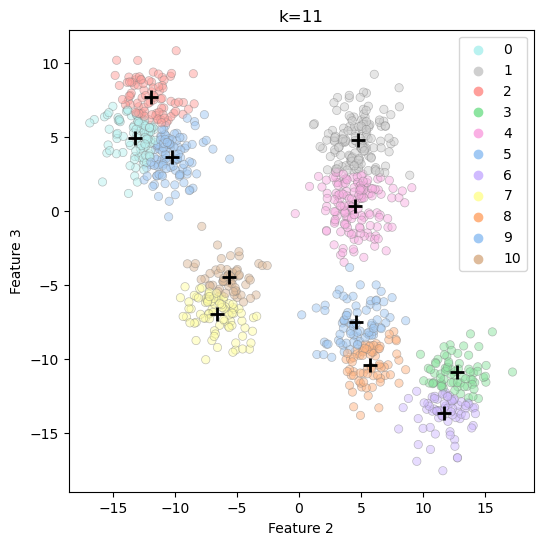

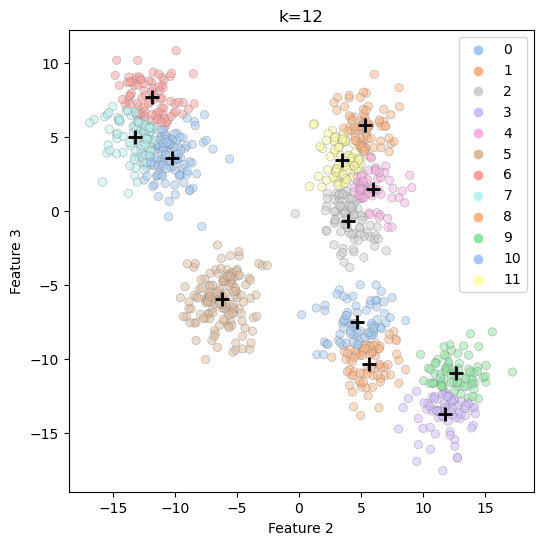

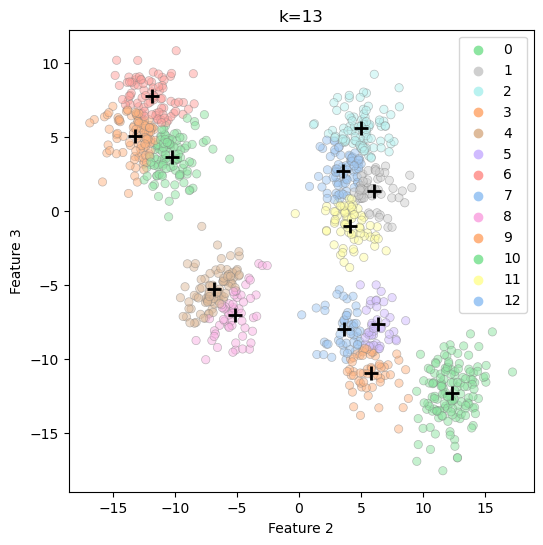

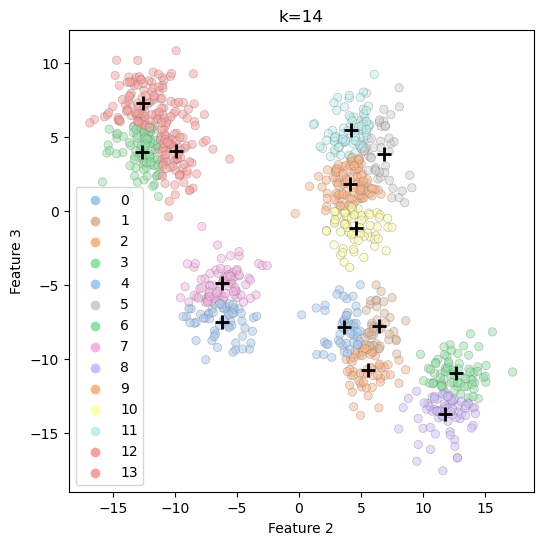

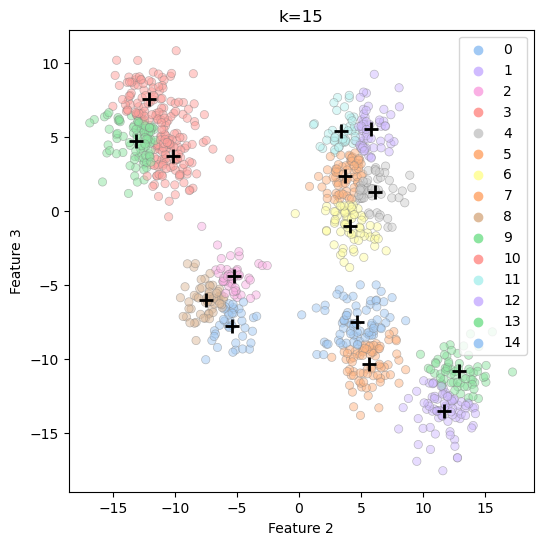

In [12]:
#Algorithm 1 -kmeans
#Kmeans cluster assignment
display(df_km)

#Kmeans cluster assignment centroids
display(results_km['centroids'])

# We can also visualize clusters assignments and their centroids for different k values on the data

##assigning the color palette for cluster colors
colorPalette='pastel'

##we can loop over different k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  
for k in k_values:
    ###binding the palette to each cluster unique label so that each cluster has its own color
    '''In order to generate the colors correctly, we have ensure that the number of unique clusters matches the
    number of colors in the color palette. If the number of unique clusters is greater than the number of colors in the palette,
    it will result in a ValueError.If we don't specify the lenght as len(df_km[f'cluster_k{k}_km'].unique()) it will end up with
    an error'''
    
    colors_k_km = dict(zip(df_km[f'cluster_k{k}_km'].unique(), sns.color_palette(colorPalette, 
                    len(df_km[f'cluster_k{k}_km'].unique())))) 

    ###Plot the clusters 
    ###set the figure size
    plt.figure(figsize = (6, 6))
    ### first plot the data point themselves (here we use "cluster_k6_kmeans" column for hue and palette for our assigned 
    ### unique colors)
    ax = sns.scatterplot(x='Feature 2', y='Feature 3',hue=f'cluster_k{k}_km',palette=colors_k_km,data=df_km,
                         edgecolor='grey',alpha=0.5)

    ###now we can add the centroids
    centroids = results_km['centroids'][k]  # Access the correct centroids for the given k value
    ax = sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], linewidth=2.0, marker='+', s=100, color='black')

    ### Set the title for the plot
    ax.set_title(f'k={k}')

        

Feature 2  Feature 3  cluster_k2_gmm  cluster_k3_gmm  cluster_k4_gmm  \
0     0.216832  -7.007719               0               2               2   
1     5.984760 -11.123214               0               2               2   
2    11.917844  -9.795153               0               2               2   
3   -11.034426   9.054639               1               0               0   
4    11.714095 -13.337149               0               2               2   
..         ...        ...             ...             ...             ...   
995   5.510563 -10.989612               0               2               2   
996 -12.421054   4.547262               1               0               0   
997 -10.625035   4.655652               1               0               0   
998   4.230038  -1.565846               0               1               1   
999 -11.333230   9.280411               1               0               0   

     cluster_k5_gmm  cluster_k6_gmm  cluster_k7_gmm  cluster_k8_gmm  \
0                 4               2               4               1   
1                 4               2               4               6   
2                 2               1               2               3   
3                 0               3               1               5   
4                 2               1               2               3   
..              ...             ...             ...             ...   
995               4               2               4               6   
996               0               3               1               0   
997               0               3               1               0   
998               1               4               0               7   
999               0               3               1               5   

     cluster_k9_gmm  cluster_k10_gmm  cluster_k11_gmm  cluster_k12_gmm  \
0                 4                6                4                6   
1                 5                3                6                4   
2                 2                5                1                7   
3                 1                2                8                5   
4                 8                5               10               10   
..              ...              ...              ...              ...   
995               5                3                6                4   
996               6                8                2                3   
997               6                8                5                3   
998               0                4                9                9   
999               1                2                8                5   

     cluster_k13_gmm  cluster_k14_gmm  cluster_k15_gmm  
0                  1                0               13  
1                  9                0                5  
2                  4                6               12  
3                  6                8                8  
4                  4                4                7  
..               ...              ...              ...  
995                9                0                5  
996                0                1               14  
997                5                1               14  
998               12                7                6  
999               11                8                8  

[1000 rows x 16 columns]

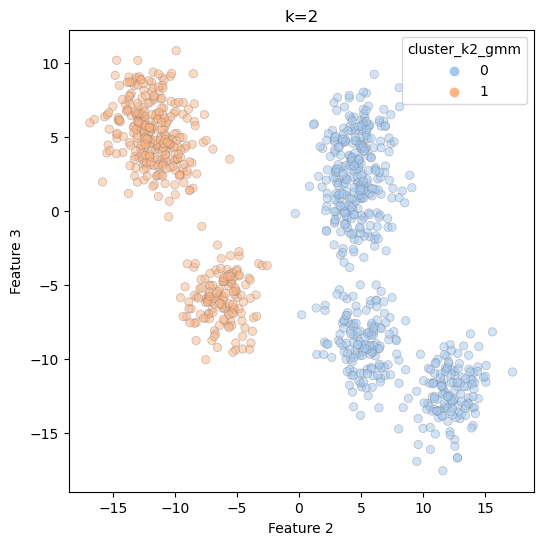

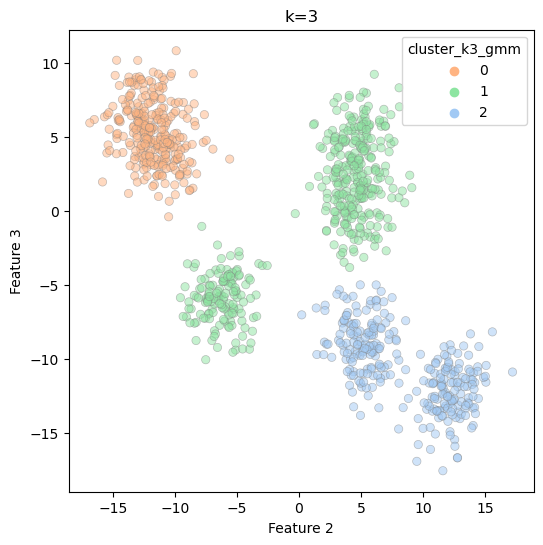

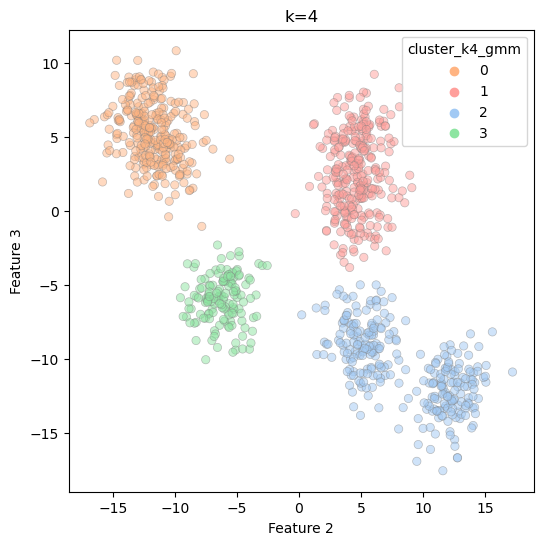

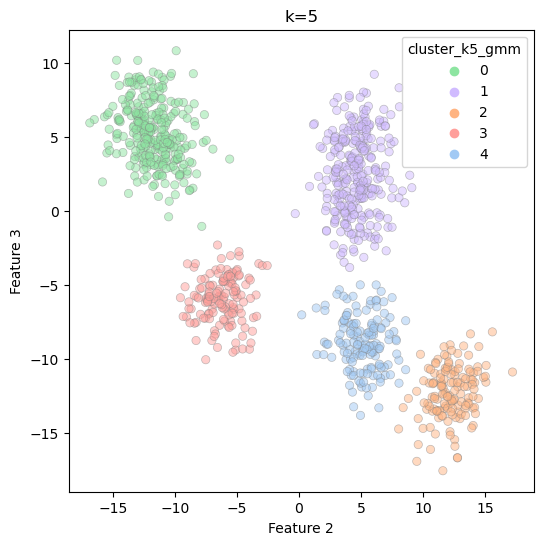

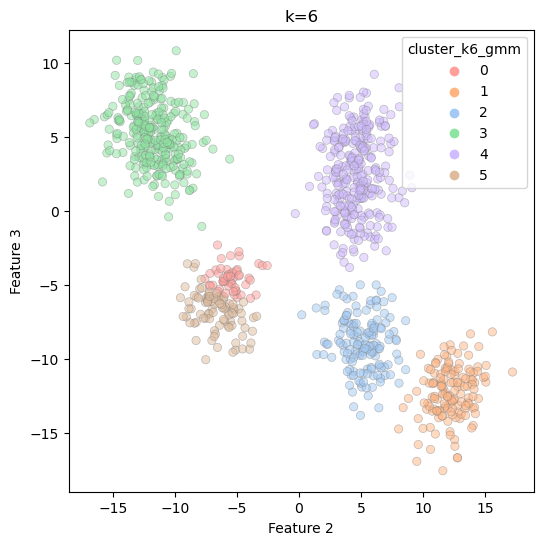

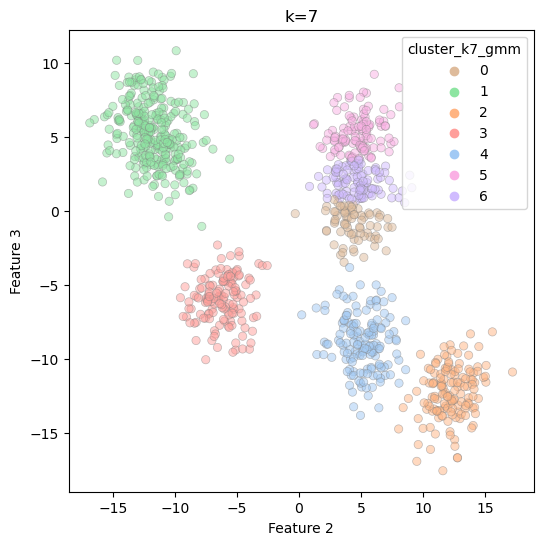

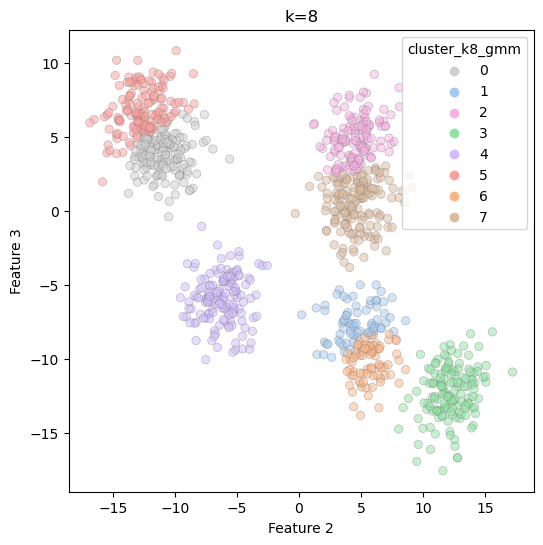

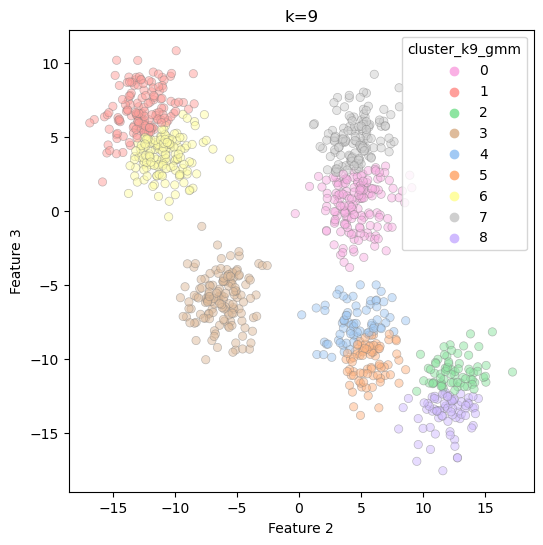

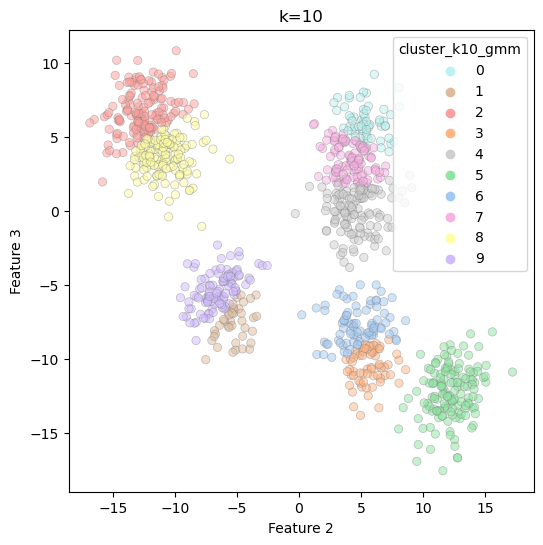

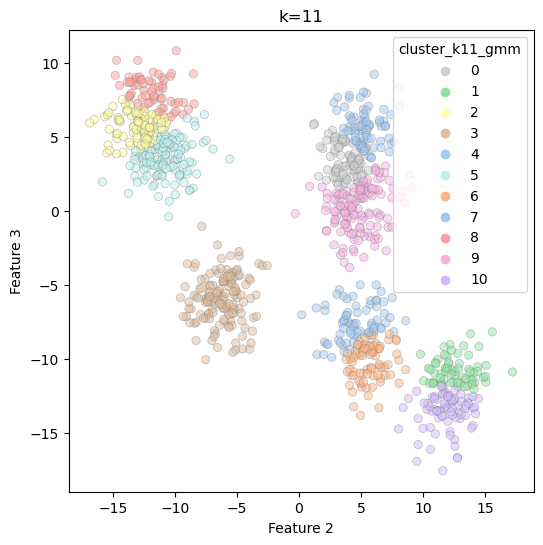

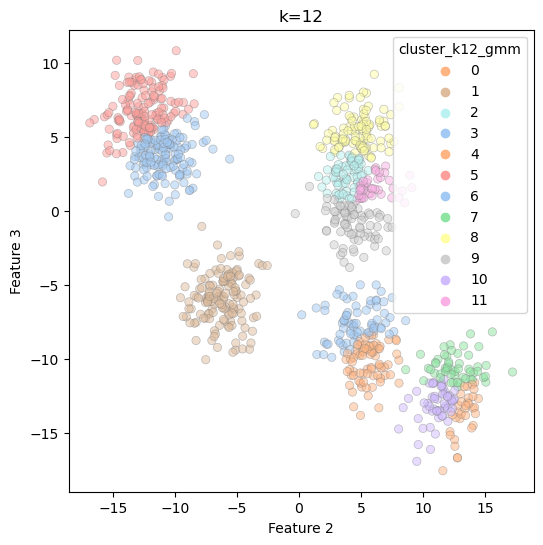

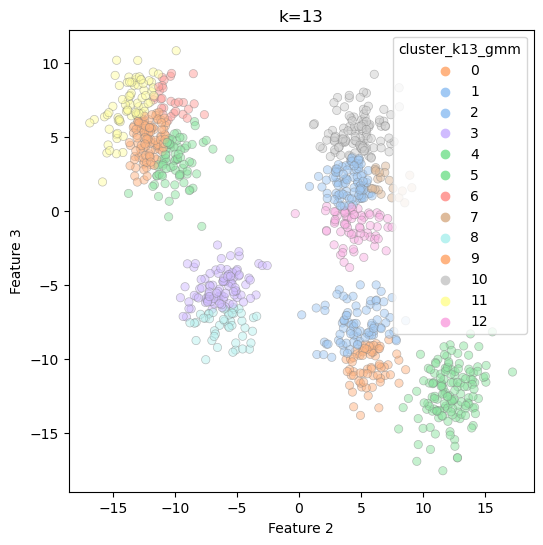

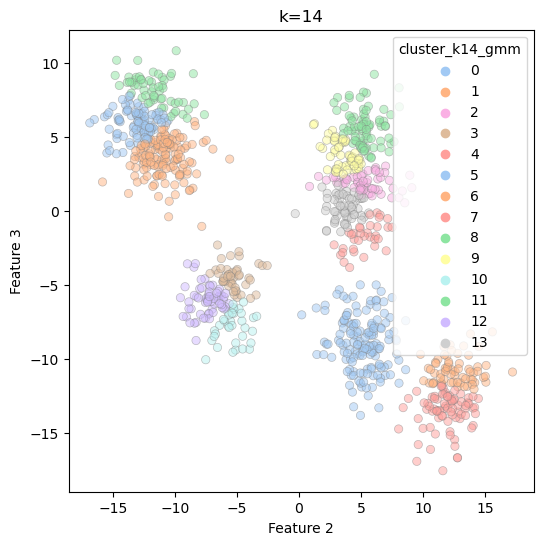

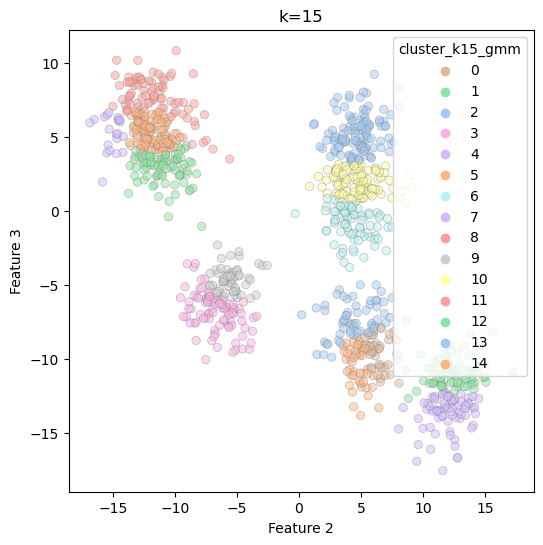

In [13]:
#Algorithm 2 -gaussion mixture model
#GMM cluster assignment
display(df_gmm)

# We can also visualize clusters assignments for different k values on the data

##assigning the color palette for cluster colors
colorPalette='pastel'

##we can loop over different k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  

for k in k_values:
    ###binding the palette to each cluster unique label so that each cluster has its own color
    '''In order to generate the colors correctly, we have ensure that the number of unique clusters matches the
    number of colors in the color palette. If the number of unique clusters is greater than the number of colors in the palette,
    it will result in a ValueError.If we don't specify the lenght as len(df_km[f'cluster_k{k}_km'].unique()) it will end up with
    an error'''
    
    colors_k_gmm = dict(zip(df_gmm[f'cluster_k{k}_gmm'].unique(), sns.color_palette(colorPalette, 
                    len(df_gmm[f'cluster_k{k}_gmm'].unique())))) 

    ###Plot the clusters 
    ###set the figure size
    plt.figure(figsize = (6, 6))
    ### first plot the data point themselves (here we use "cluster_k6_kmeans" column for hue and palette for our assigned 
    ### unique colors)
    ax = sns.scatterplot(x='Feature 2', y='Feature 3',hue=f'cluster_k{k}_gmm',palette=colors_k_gmm,data=df_gmm,
                         edgecolor='grey',alpha=0.5)

    ### Set the title for the plot
    ax.set_title(f'k={k}')


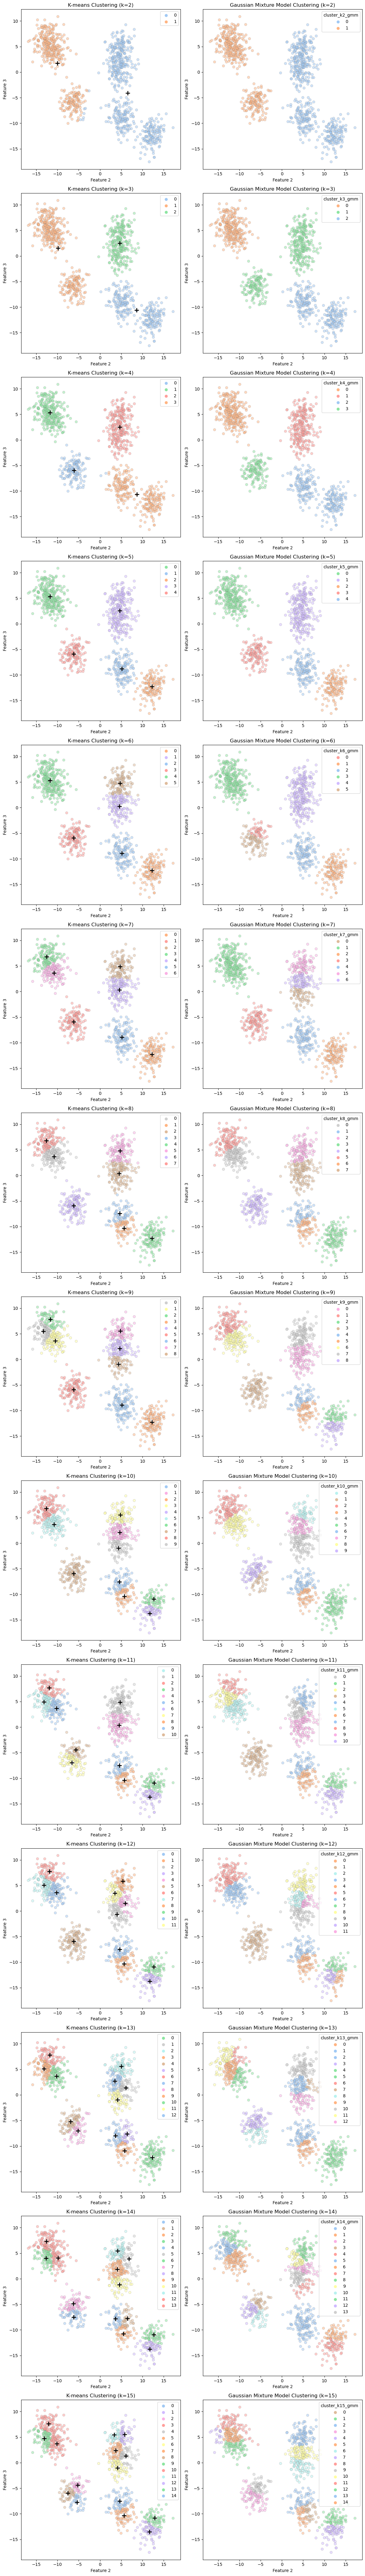

In [11]:
#visual comparison of two clustering algorithms side by side:

#different k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  

# Set the figure size and subplot configuration
fig, axs = plt.subplots(len(k_values), 2, figsize=(12, 6*len(k_values)))

# K-means clustering (as I described above)
#loop over each cluster values and index values for each subplot
for i, k in enumerate(k_values):#the i variable is used to access the corresponding subplot in the axs array to plot the 
    #results side by side.k as I used before iterates over different k values
    #enumerate iterates two iterates simulatenously instead of we say this for k in k values we say for i, k in enumerate(k_values).
    #providing unique color for each cluster 
    colors_k_km = dict(zip(df_km[f'cluster_k{k}_km'].unique(), sns.color_palette(colorPalette, len(df_km[f'cluster_k{k}_km'].unique()))))
    #plot the data and color the each cluster 
    ax = sns.scatterplot(x='Feature 2', y='Feature 3', hue=f'cluster_k{k}_km', palette=colors_k_km, data=df_km, edgecolor='grey', alpha=0.5, ax=axs[i][0])
    #assign the centroids
    centroids = results_km['centroids'][k]
    #add the centroids in the plot
    ax = sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], linewidth=2.0, marker='+', s=100, color='black', ax=axs[i][0])
    #add the title
    ax.set_title(f'K-means Clustering (k={k})')

# Gaussian Mixture Model clustering (as I described above)
#loop over each cluster values and index values for each subplot
for i, k in enumerate(k_values):
    #providing unique color for each cluster 
    colors_k_gmm = dict(zip(df_gmm[f'cluster_k{k}_gmm'].unique(), sns.color_palette(colorPalette, len(df_gmm[f'cluster_k{k}_gmm'].unique()))))
    #plot the data and color the each cluster
    ax = sns.scatterplot(x='Feature 2', y='Feature 3', hue=f'cluster_k{k}_gmm', palette=colors_k_gmm, data=df_gmm, edgecolor='grey', alpha=0.5, ax=axs[i][1])
    #add the title
    ax.set_title(f'Gaussian Mixture Model Clustering (k={k})')

# Adjust the spacing between subplots
plt.tight_layout()


5. How many clusters would you predict?

    * Both algorithms metric scores are mostly matching on k=4 and on k=5:
    * Silhouette Score is a metric used to evaluate the quality of clustering results and higher value indicates better clustering result and this represented for both algorithms  at k=4.
    * Similar to Silhouette Score, high value of Calinski Harabasz Score indicates better-defined and more separated clusters and this represented for Kmeans at=7 and for gmm at k=5. 
    * Lastly Unlike two other scores, the lowest value of Davies Bouldin Score indicates better clustering and this represented for both algorithms at k=5. 

    * Furthermore, both algorithms provided somewhere similar and somewhere different cluster seperations amoung different k values based on their mathematical/statistical (probabilistic) approach to the clustering problem. 
    
    * When we increase the number of clusters, unlike kmeans algoritm, gaussion mixture model provided more complex clustering approach and resulted more distorted clusters than compact uniform clusters. I would say that Kmeans algoritm is better fits with this type of clustering.Here we can tell that based on our results, selection of the clustering algorithm is really matter to its success. Not every algorithm fits the data well and pre-visualatization the data is key to decide the most suitable approach and better success. https://scikit-learn.org/stable/modules/clustering.html website provided very nice overview for the data and which algorithm could suits the certain data type. I believe that for clustering approach of the Feature 2 and Feature 3, as https://scikit-learn.org/stable/modules/clustering.html suggestion, K-means and Gaussion mixture models provided a good performance although the performance of K-means was much better. 
    
    Let's come to question, which is how many clusters would you predict?

    In the module we learned the Ockham's razor principle which states that "when you have two competing theories that make exactly the same predictions, the simpler should be preferred". Based on the matching metric scores and the Ockham's razor principle we might consider in between k=4 and k=5. By visual inspection,which is very essential, k=5 fits the data well than k=4 due to well separation of clusters and most of the metric scores are also favors of k=5 therefore I would to choose k=5. However, in real world scenerio, in order to make a final decision, we should  also have the domain knowledge and specific reasoning of the clustering approach.
    

        